In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

In [15]:
data = pd.read_csv('Data\A_Z-Handwritten-Data.csv')

In [16]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data_labels = np.array(data.iloc[:,0].values)
data_letters = np.array(data.iloc[:,1:].values)

In [21]:
def reshape_normalize(data):
    data = data / 255.0
    data = data.reshape(len(data), 28, 28, 1)
    return data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data_letters,
                                                  data_labels,
                                                  test_size=0.2,
                                                  random_state=42)

In [23]:
x_train = reshape_normalize(x_train)
x_test = reshape_normalize(x_test)

print('training set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

training set:  (297960, 28, 28, 1) (297960,)
test set:  (74490, 28, 28, 1) (74490,)


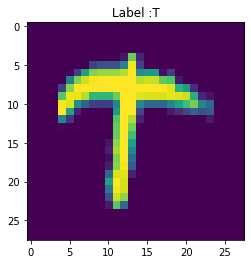

In [24]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def show_image(image, label):
    image = image.reshape([28, 28])
    plt.title('Label :' + letters[label])
    plt.imshow(image)

n = random.randint(0, len(x_train))
show_image(x_train[n], y_train[n])

In [25]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, 3, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [26]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
7449/7449 [==============================] - 207s 28ms/step - loss: 0.5788 - accuracy: 0.8217 - val_loss: 0.1665 - val_accuracy: 0.9529
Epoch 2/10
7449/7449 [==============================] - 187s 25ms/step - loss: 0.3053 - accuracy: 0.9083 - val_loss: 0.1378 - val_accuracy: 0.9585
Epoch 3/10
7449/7449 [==============================] - 208s 28ms/step - loss: 0.2530 - accuracy: 0.9249 - val_loss: 0.1194 - val_accuracy: 0.9652
Epoch 4/10
7449/7449 [==============================] - 190s 25ms/step - loss: 0.2236 - accuracy: 0.9339 - val_loss: 0.1228 - val_accuracy: 0.9638
Epoch 5/10
7449/7449 [==============================] - 189s 25ms/step - loss: 0.2091 - accuracy: 0.9384 - val_loss: 0.1136 - val_accuracy: 0.9684
Epoch 6/10
7449/7449 [==============================] - 177s 24ms/step - loss: 0.1967 - accuracy: 0.9419 - val_loss: 0.1072 - val_accuracy: 0.9692
Epoch 7/10
1626/7449 [=====>........................] - ETA: 2:23 - loss: 0.1939 - accuracy: 0.9437

KeyboardInterrupt: 

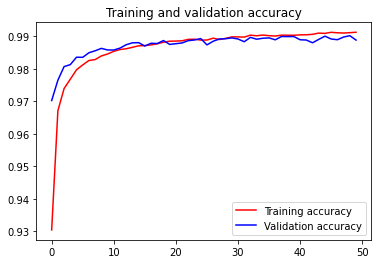

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

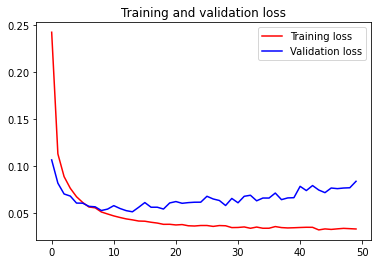

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

2328/2328 - 11s - loss: 0.0832 - accuracy: 0.9892 - 11s/epoch - 5ms/step
Test Loss:  0.08322376757860184
Test Accuracy:  0.9892334342002869


1/1 [==============================] - 0s 34ms/step


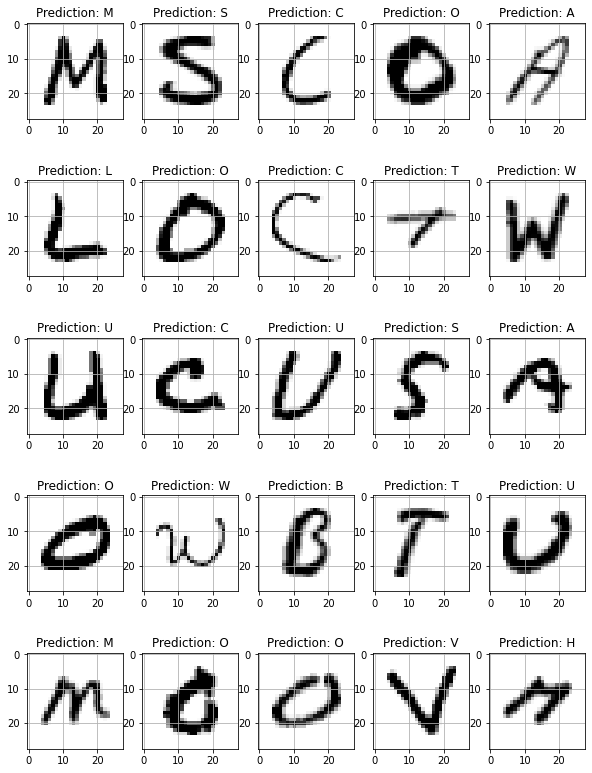

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(10,14))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(x_test[i], (28,28))
    # img = np.fliplr(img)
    # img = np.rot90(img)
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = letters[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: " + pred)
    ax.grid()

In [ ]:
model_version = '1'
model_name = 'az_handwritten'
file_name = "./Model/{}/{}/az_model.h5".format(model_name, model_version)
saved_model_path = os.path.join('/Model',model_name, model_version,file_name)
model.save(file_name)

In [ ]:
# !tensorflowjs_converter --input_format=keras {saved_model_path} ./